## Astronomy 534 "Extragalactic Universe" (Winter 2025)

### Power spectrum of cosmological perturbations

**Learning goals:** understand the linear growth of cosmological perturbations at different spatial scales, the origin of the transfer function, and the final shape of the power spectrum.

The power spectrum of primordial perturbations is defined via the transfer function $T(k)$:

$$
   P(k) = A \, k^{n_s} \, T(k)^2 
$$

The normalization $A$ is obtained by integrating the power spectrum of all $k$ with a top-hat window function (the Fourier transform of a constant-density sphere) of radius $r = 8\, h^{-1}$ Mpc:

$$
   \sigma_8^2 = \frac{1}{(2\pi)^3} \int_0^\infty W^2(kr) \, P(k) \, 4\pi k^2 dk, 
   \quad\mathrm{where}\quad W(x) = {3 (\sin{x} - x \cos{x}) \over x^3}
$$
   
The product $kr$ is dimensionless, and therefore, a good unit for $k$ is $h$ Mpc$^{-1}$.

#### Transfer Function

To understand the origin of the transfer function, it is useful to consider potential perturbations in addition to the density perturbations. They are related via the Poisson equation:

$$
   \nabla^2 \Phi = 4\pi G \bar{\rho} \delta
$$

Taking the Fourier transform gives

$$
   -\frac{k^2}{a^2} \Phi_k(t) = 4\pi G \bar{\rho}(t) \delta_k(t)
$$

Here $a^2$ appears because the gradient is over proper coordinates, while $k$ is comoving. Since $\bar{\rho}(t) = \bar{\rho}_0\, a^{-3}$, this equation can be rewritten as

$$
   -\Phi_k(t) = 4\pi G \bar{\rho}_0 \, k^2 \, \frac{\delta_k(t)}{a(t)}
$$

In the matter-dominated era dark matter perturbations grow as $\delta_k(t) \propto D_+(t) = a(t)$, while in the radiation-dominated era the growth is very weak, $\delta_k(t) \propto \log(t)$.

This means that the potential perturbations remain *constant* during the matter-dominated era but *decrease* as $\frac{\log(t)}{a(t)}$ during the radiation-dominated era. The magnitude of the decrease depends on when a perturbation enters the horizon during the radiation-dominated era, which is when the proper wavelength $\lambda$ equals the particle horizon $d_H$:

$$
   \lambda(t) = \frac{2\pi a(t)}{k} = d_H(t) = \frac{2c}{H_0\, \Omega_{m0}\,^{1/2}}\, a(t)^{3/2}
$$

This gives the horizon crossing epoch for the perturbation of comoving wavenumber $k$:

$$
   a_{\rm cross}\,(k) = k^{-2} \, \frac{\pi^2 H_0^2\, \Omega_{m0}}{c^2}
$$

The epoch of matter-radiation equality is $a_{\rm eq} = \Omega_{r0}\, / \Omega_{m0} = 4\times 10^{-5}\, (\Omega_{m0}\, h^2)^{-1}$. The amplitude of a small-scale potential perturbation that enters the horizon at $a_{\rm cross}\,(k) < a_{\rm eq}$ will therefore be reduced by a factor 

$$
   \frac{1+2\log(a_{\rm eq}\,/a_{\rm cross}\,(k))}{a_{\rm eq}\,/a_{\rm cross}\,(k)}
$$

It can be equivalently rewritten in terms of the ratio of wavenumbers

$$
   \frac{1+4\log(k/k_{\rm eq})}{(k/k_{\rm eq})^2}
$$

where $k_{\rm eq}$ is defined as $a_{\rm cross}\,(k_{\rm eq}) = a_{\rm eq}$. Its numerical value is $k_{\rm eq} \approx 0.01$ Mpc$^{-1}$ (from Planck 2018 results).

The ratio of the potential perturbations on two spatial scales is the same as the ratio of the density perturbations, and therefore the transfer function on small scales is

$$
   T(k) \propto \frac{\log(k/k_{\rm eq})}{(k/k_{\rm eq})^2}
   \quad\mathrm{for}\quad k \gg k_{\rm eq}
$$

On scales $k \ll k_{\rm eq}$, the potential perturbations remain constant and $T(k) \approx 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('mplstyle.txt')

In [2]:
# Planck 2018 cosmological paremeters
h100 = 0.677
Om0 = 0.1424/h100**2
Ob0 = 0.0224/h100**2
ns = 0.967
sigma8 = 0.81
zeq = 3387.
keq = 0.01034/h100 # in h Mpc^-1
Tcmb0 = 2.726 # in K

Here is an illustration of the evolution of potential perturbations on several scales:

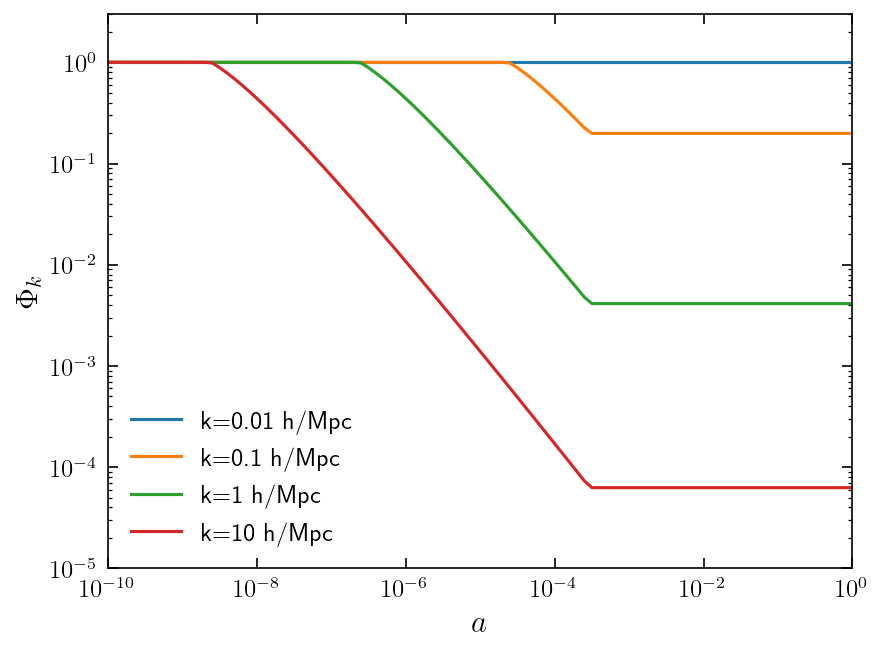

In [3]:
def Phi_k( k, a ):
    f = 1.
    aeq = 1./(1+zeq)
    across = aeq*(keq/k)**2
    if k > keq and a > 3*across:
        if a < aeq:
            f = across/a * (1+2.*np.log(a/across))
        else:
            f = across/aeq * (1+2.*np.log(aeq/across))
    return f

a = np.logspace(-10, 0, 101)

for k in [ 1e-2, 1e-1, 1, 10 ]:
    phik = [ Phi_k( k, aa ) for aa in a ]
    plt.plot(a, phik, label=('k=%g h/Mpc'%k))
    
plt.xlabel(r'$a$')
plt.ylabel(r'$\Phi_k$')
plt.xlim(1e-10, 1)
plt.ylim(1e-5, 3)
plt.loglog()
plt.legend(loc='lower left');

And this is how the corresponding density perturbations grow:

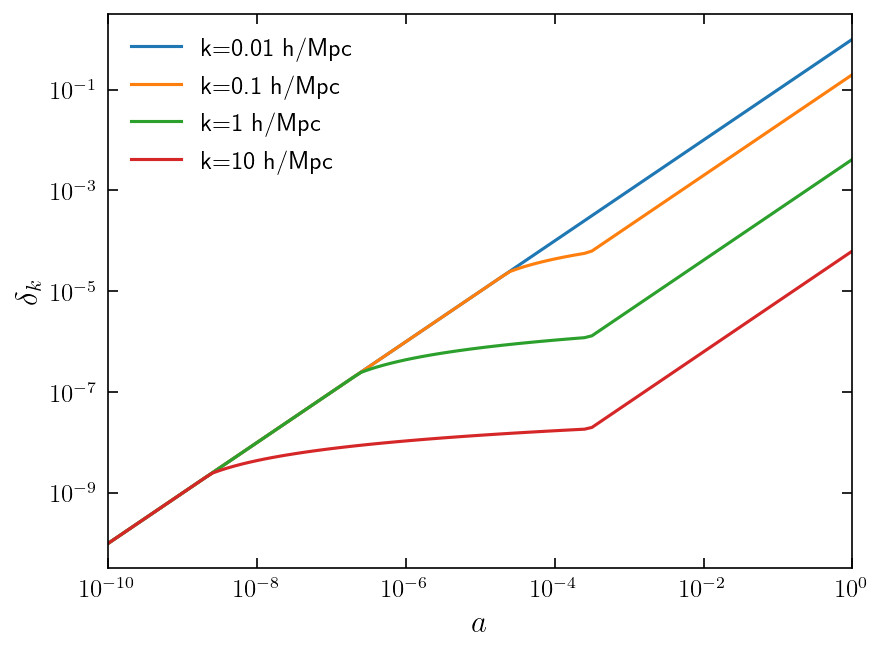

In [4]:
a = np.logspace(-10, 0, 101)
for k in [ 1e-2, 1e-1, 1, 10 ]:
    deltak = [ aa*Phi_k( k, aa ) for aa in a ]
    plt.plot(a, deltak, label=('k=%g h/Mpc'%k))
    
plt.xlabel(r'$a$')
plt.ylabel(r'$\delta_k$')
plt.xlim(1e-10, 1)
plt.loglog()
plt.legend(loc='upper left');

The package Colossus written by [Benedikt Diemer](http://www.benediktdiemer.com/) has the
[Power Spectrum module](https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#module-cosmology.power_spectrum) which uses an accurate fitting function for $T(k)$ from [Eisenstein & Hu (1998)](https://ui.adsabs.harvard.edu/abs/1998ApJ...496..605E/abstract). Below I plot it along with the small-scale approximation derived above.

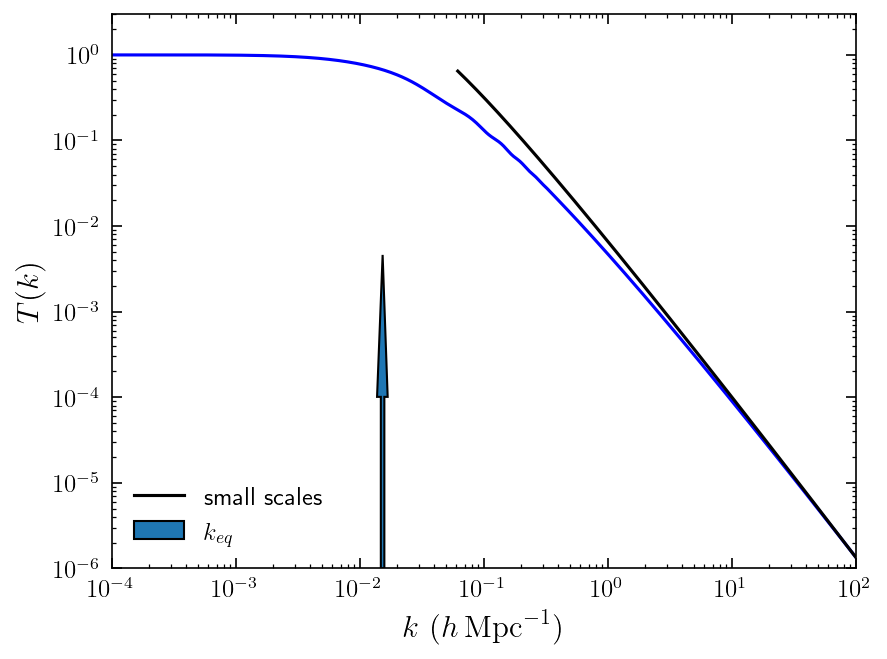

In [5]:
from colossus.cosmology import power_spectrum

k = np.logspace(-5, 4, 901) # in comoving h/Mpc

Tk = power_spectrum.modelEisenstein98(k, h100, Om0, Ob0, Tcmb0)

ksmall = k[k > 4*keq]
Tk_small = 1.6*(keq/ksmall)**2 * (1.+4.*np.log(ksmall/keq))

plt.plot(k, Tk, c='b')
plt.plot(ksmall, Tk_small, c='k', label='small scales')

plt.arrow(keq, 1e-6, 0, 1e-4, label='$k_{eq}$')
plt.xlabel(r'$k\ (h\,{\rm Mpc}^{-1})$')
plt.ylabel(r'$T(k)$')
plt.xlim(1e-4, 1e2)
plt.ylim(1e-6, 3)
plt.loglog()
plt.legend(loc='lower left');

Now we can plot the full power spectrum with the appropriate normalization through $\sigma_8$:

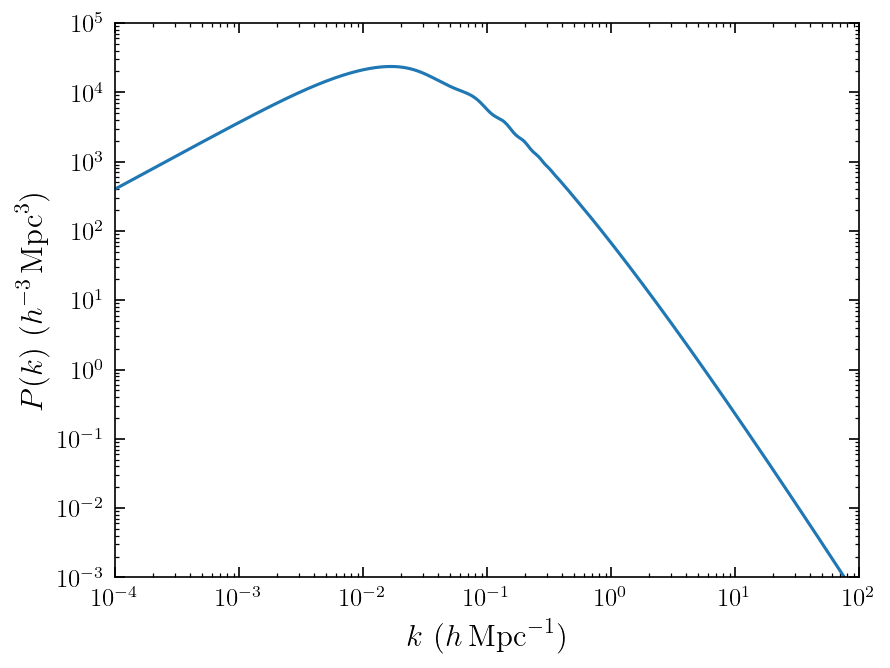

In [6]:
from scipy.integrate import quad
from scipy.interpolate import interp1d

def sig2( logk ):
    ak = 10.**logk
    T = Tk_int(ak)
    Pk = ak**ns * T**2
    x = ak*8.
    W2 = (3.*(np.sin(x)-x*np.cos(x))/x**3)**2
    f = W2/(2.*np.pi**2)*Pk*ak**2
    return f*ak*np.log(10.)

Tk_int = interp1d(k, Tk, kind='cubic')

s2 = quad(sig2, -5., 4.)[0]

Pk = k**ns * Tk**2 * sigma8**2/s2

plt.plot(k, Pk)
plt.xlabel(r'$k\ (h\,{\rm Mpc}^{-1})$')
plt.ylabel(r'$P(k)\ (h^{-3}\,{\rm Mpc}^{3})$')
plt.xlim(1e-4, 1e2)
plt.ylim(1e-3, 1e5)
plt.loglog();

Extrapolated linear overdensity smoothed over a sphere of radius $R$:

$$
   \sigma(R)^2 = \frac{1}{(2\pi)^3} \int_0^\infty W^2(kR) \, P(k) \, 4\pi k^2 dk, 
   \quad\mathrm{where}\quad W(x) = {3 (\sin{x} - x \cos{x}) \over x^3}
$$

can also be written as

$$
   \sigma(R)^2 = \int_0^\infty W^2(kR) \, \Delta^2(k) \, \frac{dk}{k}, 
   \quad\mathrm{where}\quad \Delta^2(k) = \frac{k^3 \ P(k)}{2\pi^2}
$$

$\Delta^2(k)$ represents the rms mass fluctuation on scale $R = 1/k$.

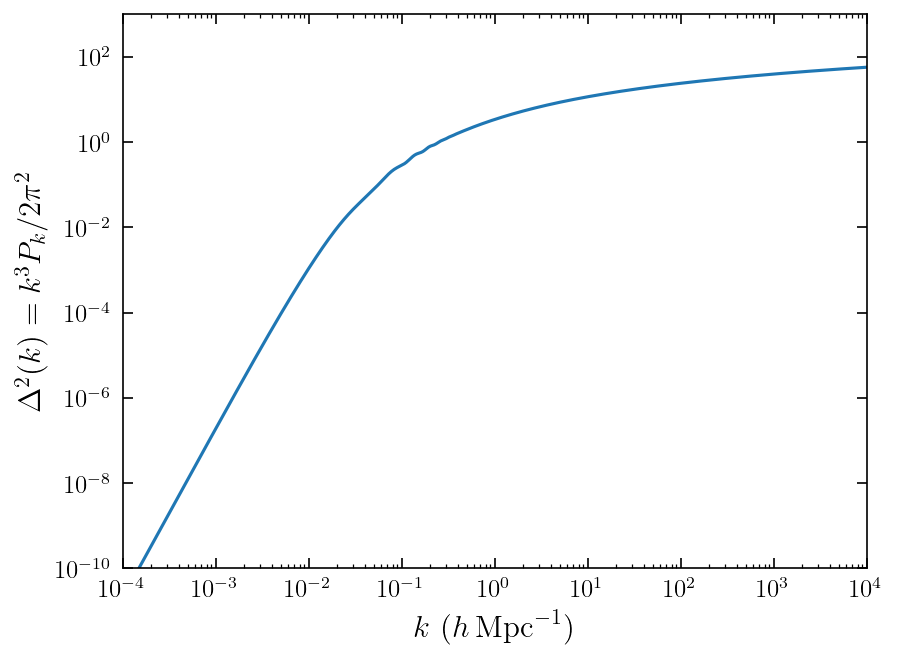

In [7]:
plt.plot(k, Pk*k**3/2/np.pi**2)

plt.xlabel(r'$k\ (h\,{\rm Mpc}^{-1})$')
plt.ylabel(r'$\Delta^2(k) = k^3 P_k / 2\pi^2$')
plt.xlim(1e-4, 1e4)
plt.ylim(1e-10, 1e3)
plt.loglog();